In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### This dataset has 3 files as explained below: 
---
- 'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

- 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

- 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [2]:
app_data = pd.read_csv("application_data.csv")
prev_app = pd.read_csv("previous_application.csv")

In [35]:
# Not really needed, good reference, used google sheets
col_desc = pd.read_csv("columns_description.csv", encoding = "latin1")

# Application Data Summary
---

## 1. Overall Summary
---
- The dataset contains 307,511 loan applications with 122 original features
- Most applicants are non-defaulters (TARGET = 0), while a smaller portion are defaulters (TARGET = 1)
- This shows a clear class imbalance in the target variable

## 2. Changes to Dataset
---
- Features with more than 40% missing values were removed as they did not provide reliable information
- After dropping these features, the dataset shape became (307511, 73)
- Features with missing values between 5% and 40% were handled using simple imputation methods such as median or mode, based on the feature type
- Features with less than 5% missing values were kept unchanged to avoid unnecessary data distortion
- Columns starting with `DAYS_` contain negative values because they represent days before the loan application date
- For better interpretability, new features in years were derived from these columns without modifying the original day-based values
- The `DAYS_EMPLOYED` column contained an abnormal placeholder value (365243), which was treated as missing before creating the `EMPLOYMENT_YEARS` feature
- New ratio-based features such as `CREDIT_INCOME_RATIO` and `ANNUITY_INCOME_RATIO` were created to better represent the applicant’s repayment burden


## 3. Univariate Analysis Summary
---
- Income, credit amount, and annuity amounts are highly skewed and show long-tailed distributions
- Ratio-based features show noticeable differences between defaulters and non-defaulters
- External score features (`EXT_SOURCE_2` and `EXT_SOURCE_3`) show clear separation between defaulters and non-defaulters
- Applicants with shorter employment history and younger age tend to show higher default rates


## 4. Bivariate and Correlation Analysis Summary
---
- Higher credit-to-income and annuity-to-income ratios are associated with higher default risk
- Applicants with lower external scores are more likely to default
- Longer employment duration is generally linked with lower chances of default
- These relationships are consistent when comparing defaulters and non-defaulters directly
- Correlation analysis was also performed separately for defaulters and non-defaulters using numeric variables to understand how relationships differ across the two groups

## Key Driver Variables
---
Based on univariate, bivariate, and correlation analysis, the following variables were identified as strong indicators of default risk:

- `CREDIT_INCOME_RATIO`
- `ANNUITY_INCOME_RATIO`
- `EXT_SOURCE_2`
- `EXT_SOURCE_3`
- `EMPLOYMENT_YEARS`

These variables consistently show different patterns for defaulters and non-defaulters and are therefore important for risk assessment.


In [25]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
app_data.shape

(307511, 122)

In [19]:
app_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [22]:
app_data["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [4]:
app_data["TARGET"].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### Missing features in application data

In [4]:
# Way too many features so I'll drop some, segmenting them into buckets so I can decide which ones to impute and which to keep

missing = app_data.isnull().mean().sort_values(ascending=False) * 100
missing.head(20)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
dtype: float64

In [5]:
high_missing = missing[missing>40]
mid_missing = missing[(missing <= 40) & (missing > 5)]
low_missing = missing[missing <= 5]

In [7]:
print(len(high_missing))
print(len(mid_missing))
print(len(low_missing))

49
8
65


In [8]:
mid_missing

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
dtype: float64

In [6]:
app_data.drop(columns=high_missing.index, inplace=True)

In [10]:
app_data.shape

(307511, 73)

In [11]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [7]:
# Can't really mode impute a feautres like these, so missing values are filled with unkown and numeric ones are with 0

app_data["OCCUPATION_TYPE"] = app_data["OCCUPATION_TYPE"].fillna("unknown") 
bureau_cols = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "AMT_REQ_CREDIT_BUREAU_YEAR"
]

app_data[bureau_cols] = app_data[bureau_cols].fillna(0)

In [8]:
app_data["EXT_SOURCE_3"] = app_data['EXT_SOURCE_3'].fillna(
    app_data['EXT_SOURCE_3'].median()
)

In [14]:
low_num = app_data[low_missing.index].select_dtypes(include=['int64', 'float64']).columns
low_cat = app_data[low_missing.index].select_dtypes(include='object').columns

low_cat

Index(['NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE',
       'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

### Fixing Days_* columns in Application Data 

In [9]:
app_data.loc[:,["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273.0
307507,-20775,365243,-4388.0,-4090,0.0
307508,-14966,-7921,-6737.0,-5150,-1909.0
307509,-11961,-4786,-2562.0,-931,-322.0


In [10]:
days_col = [col for col in app_data.columns if col.startswith("DAYS_")]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [11]:
app_data[days_col] = app_data[days_col].abs()
app_data[days_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,307511.0,16036.995067,4363.988632,7489.0,12413.0,15750.0,19682.0,25229.0
DAYS_EMPLOYED,307511.0,67724.742149,139443.751806,0.0,933.0,2219.0,5707.0,365243.0
DAYS_REGISTRATION,307511.0,4986.120328,3522.886321,0.0,2010.0,4504.0,7479.5,24672.0
DAYS_ID_PUBLISH,307511.0,2994.202373,1509.450419,0.0,1720.0,3254.0,4299.0,7197.0
DAYS_LAST_PHONE_CHANGE,307510.0,962.858788,826.808487,0.0,274.0,757.0,1570.0,4292.0


In [12]:
# Since no one likes to work for 365243 days (1000 years), assuming its a bad value or a placeholder

app_data["DAYS_EMPLOYED"] = app_data["DAYS_EMPLOYED"].replace(365243.0 , np.nan)

In [13]:
app_data["AGE_YEARS"] = app_data["DAYS_BIRTH"] / 365
app_data["EMPLOYMENT_YEARS"] = app_data["DAYS_EMPLOYED"]/365
app_data['REGISTRATION_YEARS'] = app_data['DAYS_REGISTRATION'] / 365
app_data["YEARS_ID_PUBLISH"] = app_data["DAYS_ID_PUBLISH"]/365 

In [14]:
app_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION"],inplace=True,axis=1)

### Univariate Analysis Application Data - Plots 

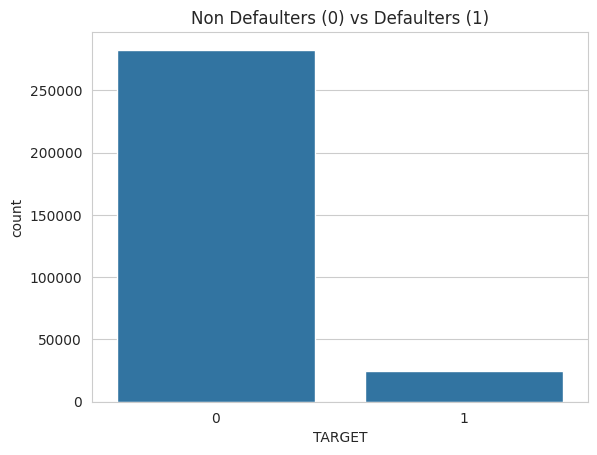

In [53]:
sns.countplot(data=app_data,x="TARGET")
plt.title("Non Defaulters (0) vs Defaulters (1)")
plt.savefig("Target countplot", bbox_inches="tight")

In [15]:
app_data["CREDIT_INCOME_RATIO"] = (
    app_data["AMT_CREDIT"] / app_data["AMT_INCOME_TOTAL"]
)
app_data["ANNUITY_INCOME_RATIO"] = (
    app_data["AMT_ANNUITY"] / app_data["AMT_INCOME_TOTAL"]
)

In [25]:
# I didnt want to plot them one by one so I just made a function.

log_scale_cols = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO"
]

hist_cols = [
    "AGE_YEARS",
    "EMPLOYMENT_YEARS",
    "REGISTRATION_YEARS",
    "YEARS_ID_PUBLISH",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
]

kde_cols = ["EXT_SOURCE_2","EXT_SOURCE_3"]
sns.set_style("whitegrid")
def plot_kde(cols,logscale=False):
    for col in cols:
        plt.figure(figsize=(6,4))

        if logscale:
            plot_data = app_data[app_data[col] > 0]
            sns.kdeplot(
                data=plot_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                log_scale=True
            )
        else:
            sns.kdeplot(
                data=app_data,
                x=col,
                hue='TARGET',
                common_norm=False,
            )
        plt.title(f"{col} by TARGET")
        plt.show()

def plot_hist(cols,logscale=False):
    for col in cols:
        plt.figure(figsize=(6,4))

        if logscale:
            plot_data = app_data[app_data[col] > 0]
            sns.histplot(
                data=plot_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                log_scale=True,
                bins = 30
            )
        else:
            sns.histplot(
                data=app_data,
                x=col,
                hue='TARGET',
                common_norm=False,
                bins=30
            )
        plt.title(f"{col} by TARGET")
        plt.savefig("histplots")
        plt.show()
        

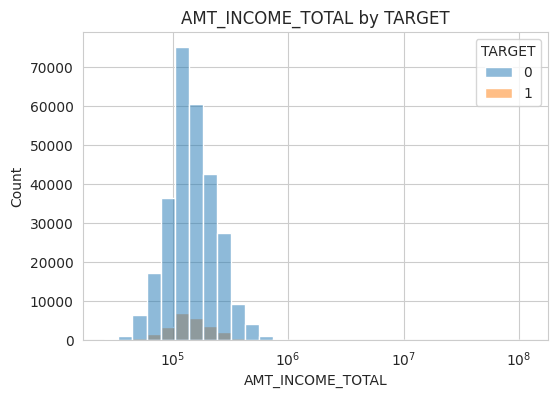

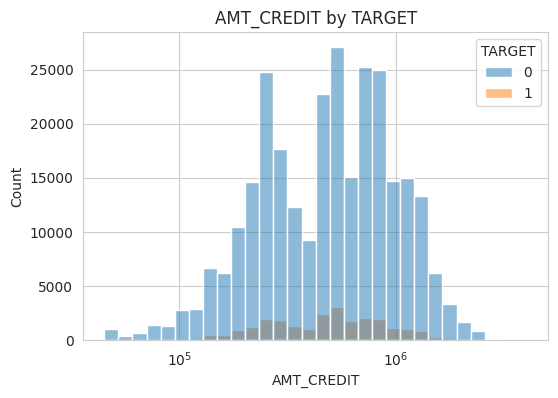

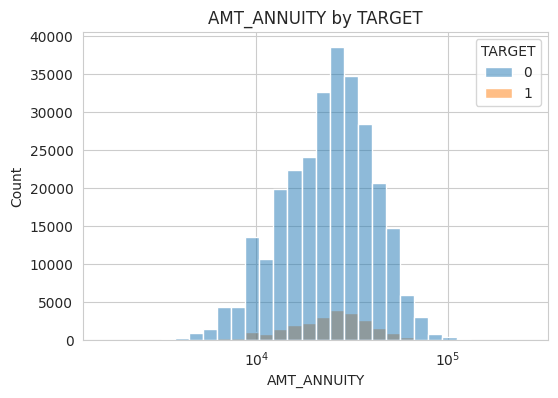

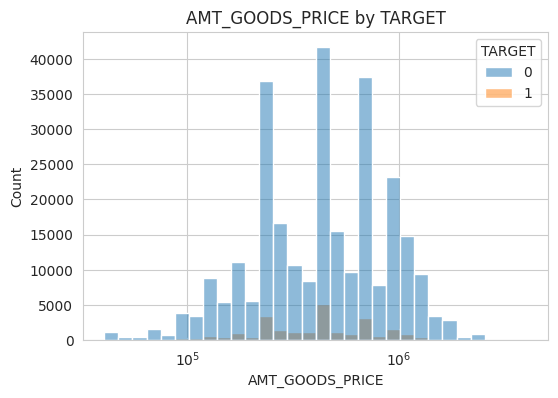

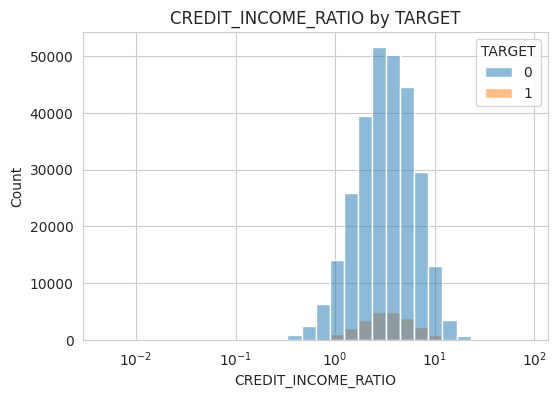

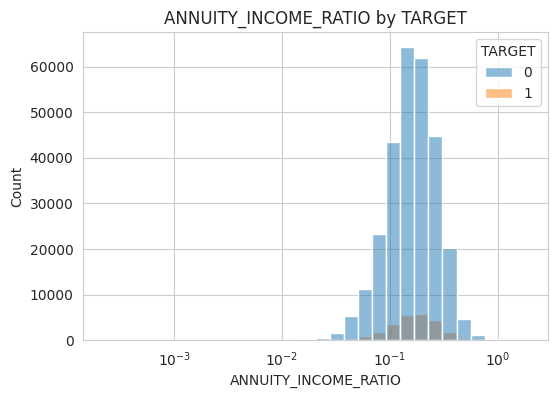

In [26]:
plot_hist(log_scale_cols,logscale=True)

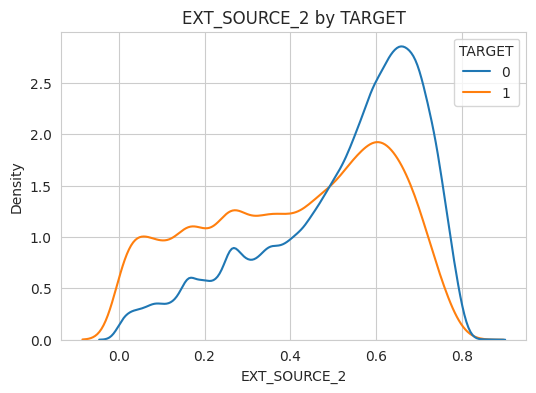

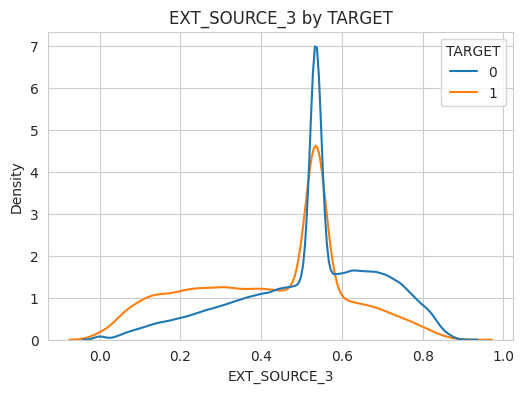

<Figure size 640x480 with 0 Axes>

In [17]:
plot_kde(kde_cols)
plt.savefig("ext_source_target")

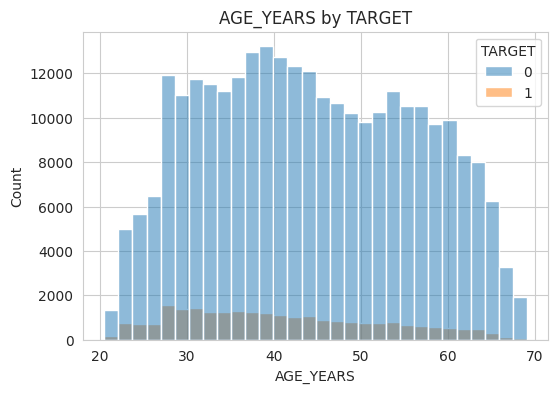

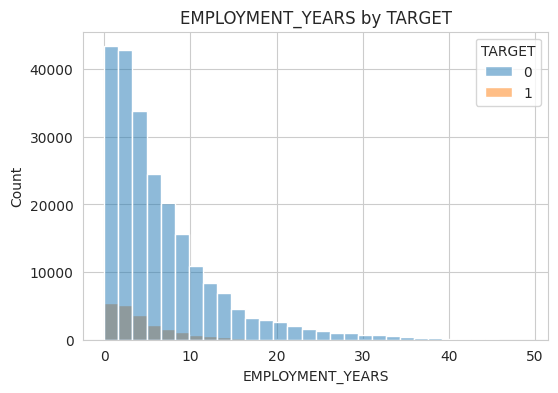

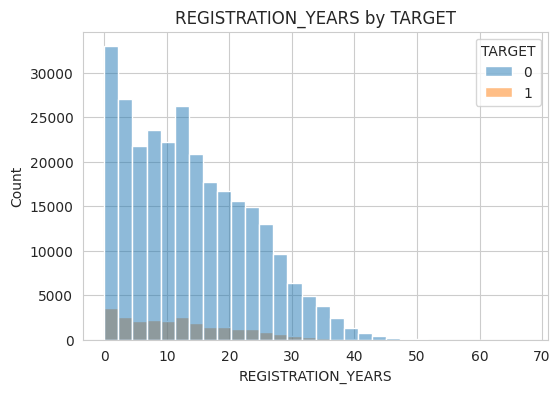

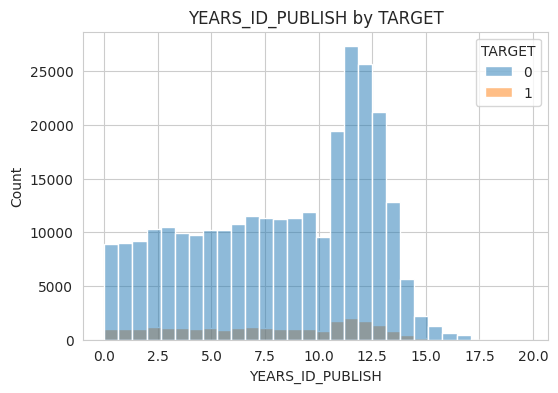

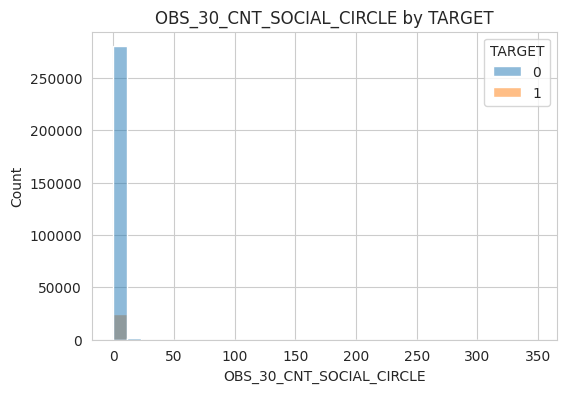

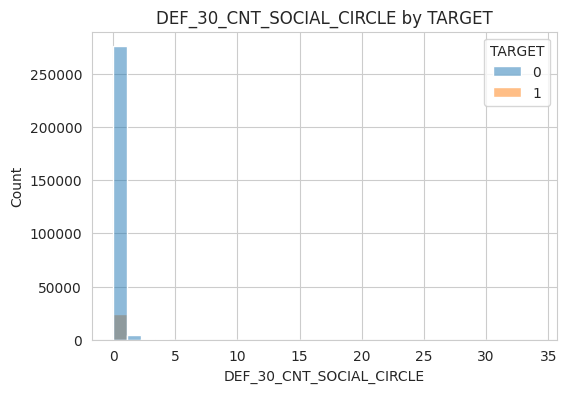

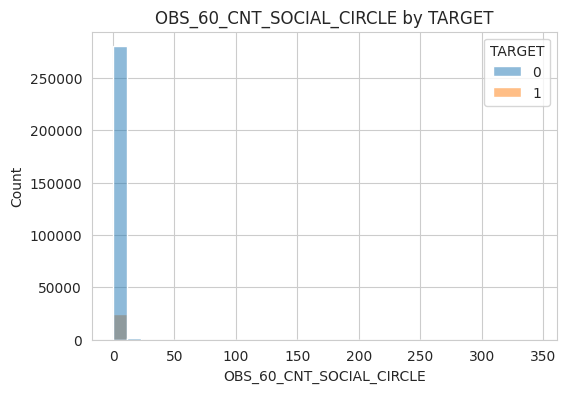

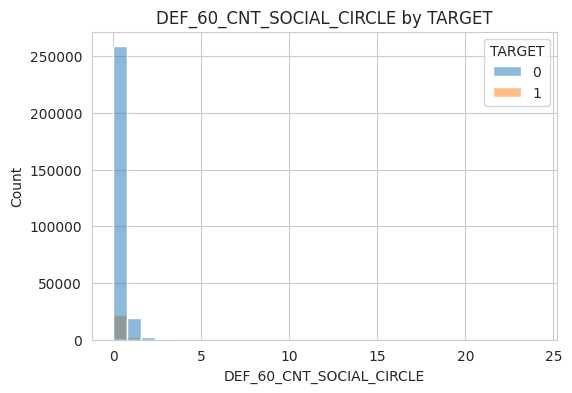

<Figure size 640x480 with 0 Axes>

In [21]:
plot_hist(hist_cols)
plt.savefig("histplots_nolog")

### Bivariate Analysis Application Data - Plots 

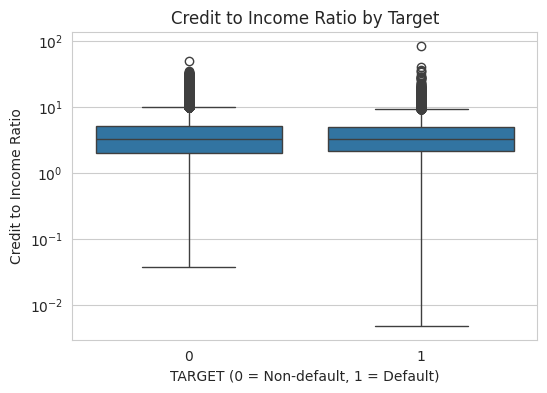

In [25]:
plt.figure(figsize=(6, 4))

plot_data = app_data[app_data["CREDIT_INCOME_RATIO"] > 0]

sns.boxplot(
    data=plot_data,
    x="TARGET",
    y="CREDIT_INCOME_RATIO"
)

plt.yscale("log")
plt.xlabel("TARGET (0 = Non-default, 1 = Default)")
plt.ylabel("Credit to Income Ratio")
plt.title("Credit to Income Ratio by Target")

plt.show()


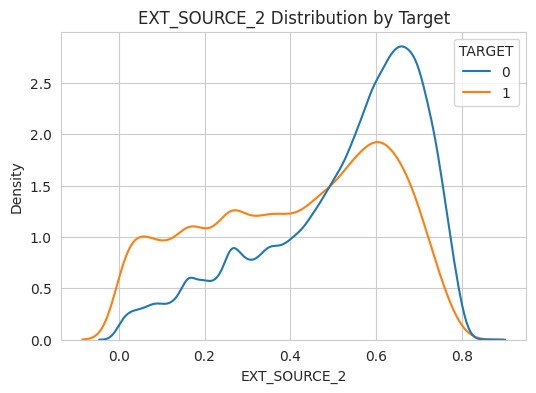

In [28]:
plt.figure(figsize=(6,4))

sns.kdeplot(
    data=app_data,
    x="EXT_SOURCE_2",
    hue="TARGET",
    common_norm=False
)

plt.title("EXT_SOURCE_2 Distribution by Target")
plt.show()


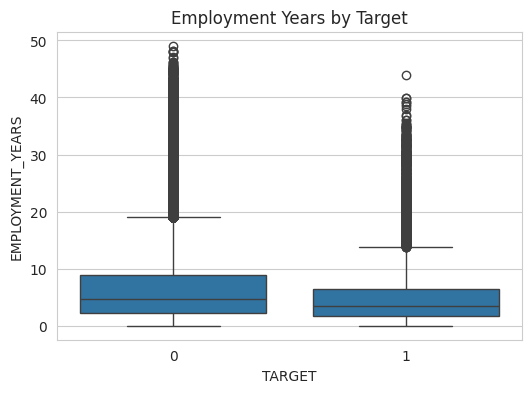

In [29]:
plt.figure(figsize=(6,4))

sns.boxplot(
    data=app_data,
    x="TARGET",
    y="EMPLOYMENT_YEARS"
)

plt.title("Employment Years by Target")
plt.show()


/tmp/ipykernel_5619/4085754881.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_data.groupby("EMP_YEARS_BIN")["TARGET"]


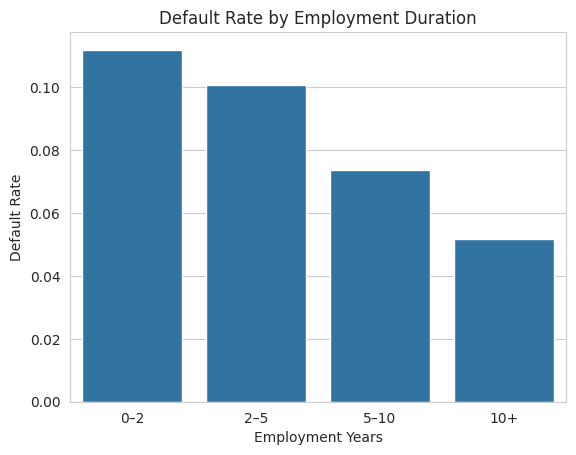

In [30]:
bins = [0, 2, 5, 10, 50]
labels = ["0–2", "2–5", "5–10", "10+"]

app_data["EMP_YEARS_BIN"] = pd.cut(
    app_data["EMPLOYMENT_YEARS"], bins=bins, labels=labels
)

emp_default_rate = (
    app_data.groupby("EMP_YEARS_BIN")["TARGET"]
    .mean()
    .reset_index()
)

sns.barplot(
    data=emp_default_rate,
    x="EMP_YEARS_BIN",
    y="TARGET"
)
plt.ylabel("Default Rate")
plt.xlabel("Employment Years")
plt.title("Default Rate by Employment Duration")
plt.savefig("Default rate by emp duration")
plt.show()



/tmp/ipykernel_5619/3310105163.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  app_data.groupby("EXT2_BIN")["TARGET"]


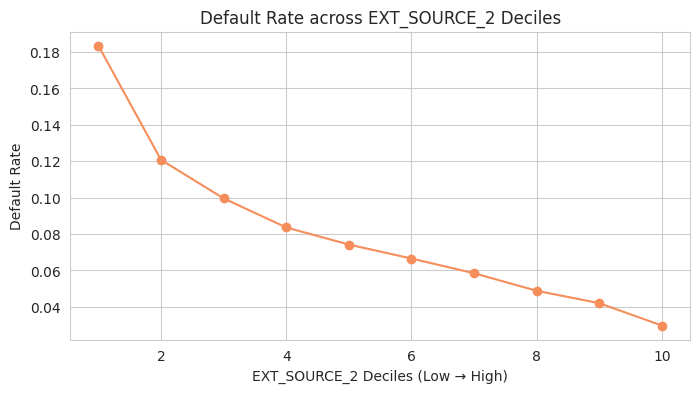

In [32]:
# Bin EXT_SOURCE_2 into deciles
app_data["EXT2_BIN"] = pd.qcut(app_data["EXT_SOURCE_2"], 10)

ext2_default_rate = (
    app_data.groupby("EXT2_BIN")["TARGET"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(
    range(1, 11),
    ext2_default_rate["TARGET"],
    marker="o",
    color = "#f58e5b"
)
plt.xlabel("EXT_SOURCE_2 Deciles (Low → High)")
plt.ylabel("Default Rate")
plt.title("Default Rate across EXT_SOURCE_2 Deciles")
plt.savefig("Default rate across extsource")
plt.show()


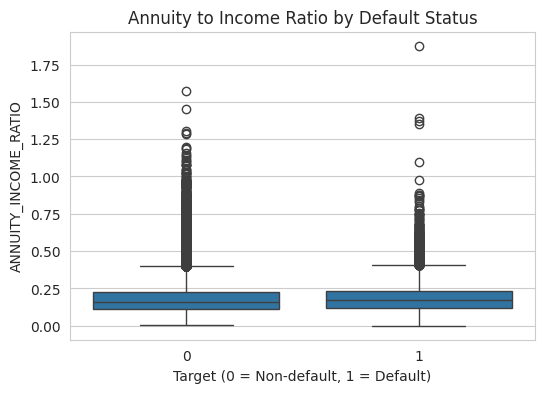

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=app_data,
    x="TARGET",
    y="ANNUITY_INCOME_RATIO"
)
plt.xlabel("Target (0 = Non-default, 1 = Default)")
plt.title("Annuity to Income Ratio by Default Status")
plt.savefig("Annuity to Income Ratio by Default Status")
plt.show()


In [34]:
num_cols = app_data.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("TARGET")

df_0 = app_data[app_data["TARGET"] == 0][num_cols]
df_1 = app_data[app_data["TARGET"] == 1][num_cols]

corr_0 = df_0.corr()
corr_1 = df_1.corr()

In [36]:
corr_0

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,EMPLOYMENT_YEARS,REGISTRATION_YEARS,YEARS_ID_PUBLISH,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.000077,0.002925,-0.001717,...,0.002298,-0.000037,0.000963,0.003517,0.001346,0.000005,0.001475,0.000077,-0.001267,-0.001341
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.028751,0.001080,0.244274,...,-0.000315,-0.007640,-0.004218,-0.030513,-0.336966,-0.063036,-0.185792,0.028751,-0.017588,-0.006100
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.022896,0.000733,0.140744,...,0.008647,0.058682,0.017676,0.042522,-0.062609,0.030102,-0.064937,-0.022896,-0.226810,-0.321585
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.001464,0.001498,0.071257,...,0.000941,0.055063,0.021825,-0.027599,0.047378,0.087500,-0.013477,0.001464,0.652130,0.375430
AMT_ANNUITY,0.000068,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.014113,0.000161,0.105645,...,0.012386,0.036294,0.011660,-0.005584,-0.012263,0.052469,-0.039436,-0.014113,0.394151,0.485310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMPLOYMENT_YEARS,0.000005,-0.063036,0.030102,0.087500,0.052469,0.088638,-0.008663,0.086679,0.001884,-0.001743,...,0.001395,0.029415,0.002094,0.024442,0.352662,1.000000,0.172102,0.086679,0.069302,0.025575
REGISTRATION_YEARS,0.001475,-0.185792,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.100236,0.000128,-0.212297,...,0.001268,0.010877,0.000363,0.022933,0.333151,0.172102,1.000000,0.100236,0.044495,0.035969
YEARS_ID_PUBLISH,0.000077,0.028751,-0.022896,0.001464,-0.014113,0.003649,0.001071,1.000000,0.002425,-0.275468,...,0.006943,0.017382,0.017089,0.061619,0.271314,0.086679,0.100236,1.000000,0.030486,0.023653
CREDIT_INCOME_RATIO,-0.001267,-0.017588,-0.226810,0.652130,0.394151,0.632094,-0.032812,0.030486,0.001223,-0.075740,...,-0.006723,-0.001172,0.001243,-0.073897,0.118667,0.069302,0.044495,0.030486,1.000000,0.787548


In [38]:
def top_corr(corr_matrix, n=10):
    corr = corr_matrix.abs()
    upper = corr.where(
        np.triu(np.ones(corr.shape), k=1).astype(bool)
    )
    return (
        upper.stack()
        .sort_values(ascending=False)
        .head(n)
    )

top_corr_0 = top_corr(corr_0)
top_corr_1 = top_corr(corr_1)

top_corr_0, top_corr_1

(DAYS_ID_PUBLISH             YEARS_ID_PUBLISH               1.000000
 OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
 AMT_CREDIT                  AMT_GOODS_PRICE                0.987250
 REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
 CNT_CHILDREN                CNT_FAM_MEMBERS                0.878571
 REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
 DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859332
 REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
 CREDIT_INCOME_RATIO         ANNUITY_INCOME_RATIO           0.787548
 AMT_ANNUITY                 AMT_GOODS_PRICE                0.776686
 dtype: float64,
 DAYS_ID_PUBLISH             YEARS_ID_PUBLISH               1.000000
 OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998269
 AMT_CREDIT                  AMT_GOODS_PRICE                0.983103
 REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
 CNT_CHILDREN    

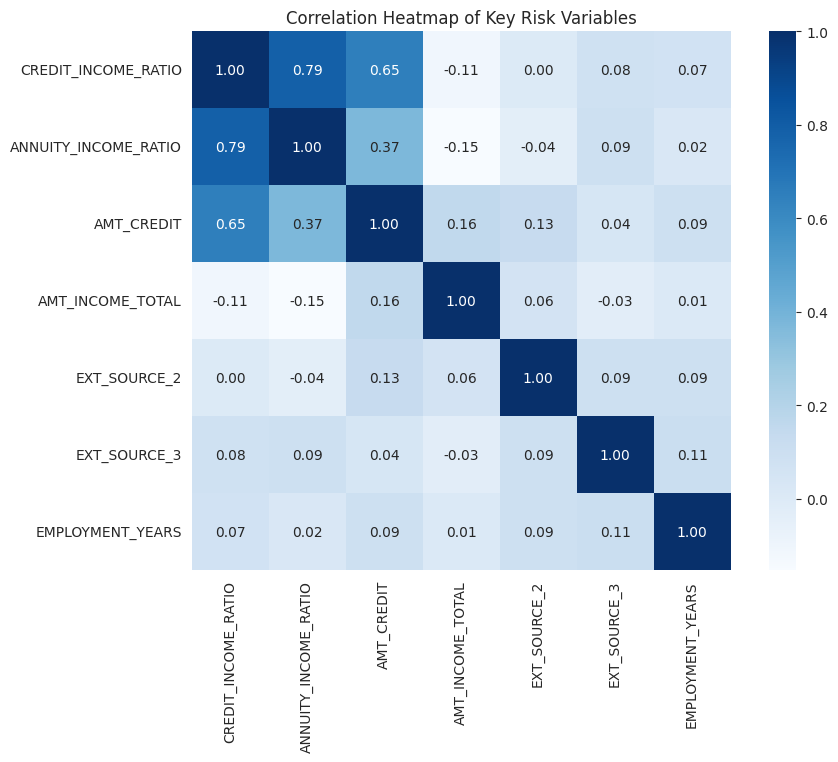

In [51]:
heatmap_cols = [
    "CREDIT_INCOME_RATIO",
    "ANNUITY_INCOME_RATIO",
    "AMT_CREDIT",
    "AMT_INCOME_TOTAL",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "EMPLOYMENT_YEARS"
]
plt.figure(figsize=(10,7))
sns.heatmap(
    app_data[heatmap_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="Blues",
    square=True
)
plt.title("Correlation Heatmap of Key Risk Variables")
plt.savefig("correlation",bbox_inches="tight")
plt.show()

# Previous Applications Data

In [22]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
prev_app.shape

(1670214, 37)

In [24]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [25]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [26]:
prev_app.drop(
    columns=[
        "SK_ID_PREV",
        "RATE_INTEREST_PRIMARY",
        "RATE_INTEREST_PRIVILEGED",
        "CHANNEL_TYPE",
        "SELLERPLACE_AREA",
        "NAME_SELLER_INDUSTRY",
        "NAME_PRODUCT_TYPE",
        "NAME_PORTFOLIO",
        "PRODUCT_COMBINATION",
        "NAME_GOODS_CATEGORY",
        "DAYS_FIRST_DRAWING",
        "DAYS_FIRST_DUE",
        "DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE",
        "DAYS_TERMINATION",
        "FLAG_LAST_APPL_PER_CONTRACT",
        "NFLAG_LAST_APPL_IN_DAY",
        "NFLAG_INSURED_ON_APPROVAL"
    ],
    inplace=True
)


In [27]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE          1670214 non-null  object 
 2   AMT_ANNUITY                 1297979 non-null  float64
 3   AMT_APPLICATION             1670214 non-null  float64
 4   AMT_CREDIT                  1670213 non-null  float64
 5   AMT_DOWN_PAYMENT            774370 non-null   float64
 6   AMT_GOODS_PRICE             1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 9   RATE_DOWN_PAYMENT           774370 non-null   float64
 10  NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 11  NAME_CONTRACT_STATUS        1670214 non-null  object 
 12  DAYS_DECISION               1670214 non-null  int64  
 1

In [28]:
prev_app["AMT_ANNUITY"] = prev_app["AMT_ANNUITY"].fillna(prev_app["AMT_ANNUITY"].median())
prev_app["CNT_PAYMENT"] = prev_app["CNT_PAYMENT"].fillna(prev_app["CNT_PAYMENT"].median())
prev_app["AMT_DOWN_PAYMENT"] = prev_app["AMT_DOWN_PAYMENT"].fillna(0)
prev_app["NAME_TYPE_SUITE"] = prev_app["NAME_TYPE_SUITE"].fillna("Unknown")

In [29]:
prev_app["IS_APPROVED"] = (prev_app["NAME_CONTRACT_STATUS"] == "Approved").astype(int)
prev_app["IS_REFUSED"] = (prev_app["NAME_CONTRACT_STATUS"] == "Refused").astype(int)

In [30]:
prev_app["CREDIT_APP_DIFF"] = prev_app["AMT_CREDIT"] - prev_app["AMT_APPLICATION"]
prev_app["LOAN_DURATION"] = prev_app["CNT_PAYMENT"]

In [31]:
prev_agg = prev_app.groupby("SK_ID_CURR").agg(
    COUNT_PREV_APPS=("SK_ID_CURR", "count"),
    APPROVAL_RATE=("IS_APPROVED", "mean"),
    REFUSAL_RATE=("IS_REFUSED", "mean"),
    AVG_PREV_CREDIT=("AMT_CREDIT", "mean"),
    AVG_PREV_ANNUITY=("AMT_ANNUITY", "mean"),
    AVG_LOAN_DURATION=("LOAN_DURATION", "mean"),
    MEAN_CREDIT_APP_DIFF=("CREDIT_APP_DIFF", "mean")
).reset_index()

In [32]:
app_data = app_data.merge(prev_agg, on="SK_ID_CURR", how="left")

In [33]:
prev_cols = prev_agg.columns.drop("SK_ID_CURR")
app_data[prev_cols] = app_data[prev_cols].fillna(0)

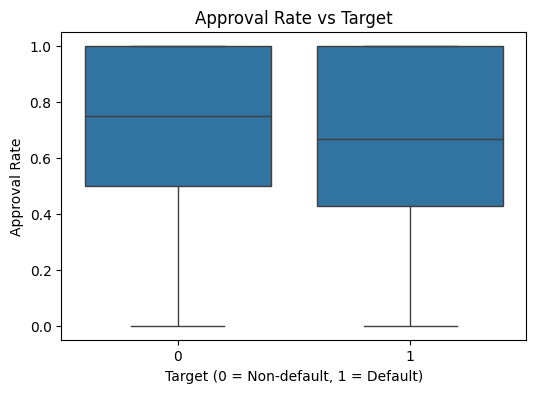

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=app_data,
    x="TARGET",
    y="APPROVAL_RATE"
)
plt.title("Approval Rate vs Target")
plt.xlabel("Target (0 = Non-default, 1 = Default)")
plt.ylabel("Approval Rate")
plt.show()

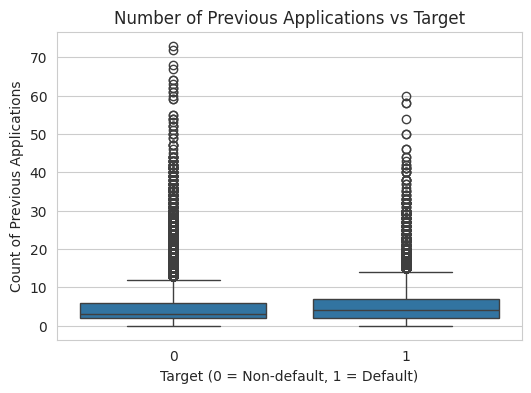

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=app_data,
    x="TARGET",
    y="COUNT_PREV_APPS"
)
plt.title("Number of Previous Applications vs Target")
plt.xlabel("Target (0 = Non-default, 1 = Default)")
plt.ylabel("Count of Previous Applications")
plt.show()


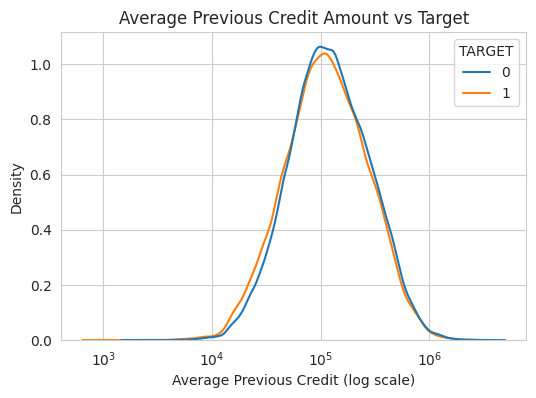

In [52]:
plt.figure(figsize=(6,4))

plot_data = app_data[app_data["AVG_PREV_CREDIT"] > 0]

sns.kdeplot(
    data=plot_data,
    x="AVG_PREV_CREDIT",
    hue="TARGET",
    log_scale=True,
    common_norm=False
)

plt.title("Average Previous Credit Amount vs Target")
plt.xlabel("Average Previous Credit (log scale)")
plt.ylabel("Density")
plt.show()


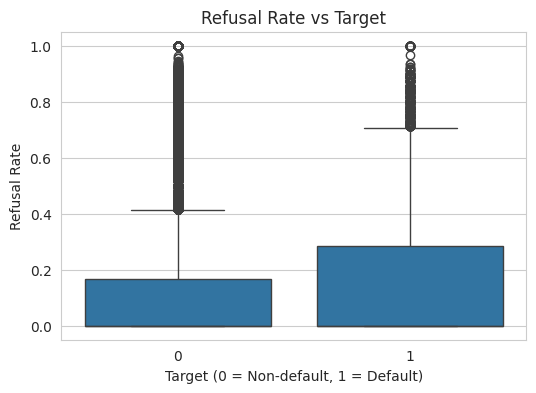

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=app_data,
    x="TARGET",
    y="REFUSAL_RATE"
)
plt.title("Refusal Rate vs Target")
plt.xlabel("Target (0 = Non-default, 1 = Default)")
plt.ylabel("Refusal Rate")
plt.show()